Average degree:  428.3959827833572
max: 5958
k,count: 5958 1
k,count: 5554 1
k,count: 5310 1
k,count: 4977 1
k,count: 4755 1
k,count: 4716 1
k,count: 4659 1
k,count: 4565 1
k,count: 4217 1
k,count: 4206 1
k,count: 4110 1
k,count: 4043 1
k,count: 3961 1
k,count: 3861 1
k,count: 3841 1
k,count: 3780 1
k,count: 3771 1
k,count: 3739 1
k,count: 3733 1
k,count: 3704 1
k,count: 3636 1
k,count: 3606 1
k,count: 3593 1
k,count: 3574 1
k,count: 3550 1
k,count: 3431 1
k,count: 3422 1
k,count: 3410 1
k,count: 3404 1
k,count: 3294 1
k,count: 3279 1
k,count: 3244 1
k,count: 3208 1
k,count: 3206 1
k,count: 3190 1
k,count: 3182 1
k,count: 3163 1
k,count: 3152 1
k,count: 3145 1
k,count: 3144 1
k,count: 3142 1
k,count: 3120 1
k,count: 3088 1
k,count: 3081 1
k,count: 3057 1
k,count: 3053 1
k,count: 3042 1
k,count: 2983 1
k,count: 2914 1
k,count: 2896 1
k,count: 2887 1
k,count: 2870 2
k,count: 2865 1
k,count: 2818 1
k,count: 2813 1
k,count: 2800 1
k,count: 2795 1
k,count: 2791 1
k,count: 2789 1
k,count: 27

k,count: 633 5
k,count: 632 1
k,count: 631 4
k,count: 630 2
k,count: 629 3
k,count: 628 4
k,count: 627 5
k,count: 626 6
k,count: 625 6
k,count: 624 7
k,count: 623 2
k,count: 622 7
k,count: 621 8
k,count: 620 6
k,count: 619 5
k,count: 618 3
k,count: 617 4
k,count: 616 3
k,count: 615 2
k,count: 614 3
k,count: 613 5
k,count: 612 7
k,count: 611 5
k,count: 610 5
k,count: 609 4
k,count: 608 4
k,count: 607 2
k,count: 606 10
k,count: 605 8
k,count: 604 3
k,count: 603 6
k,count: 602 8
k,count: 601 2
k,count: 600 5
k,count: 599 3
k,count: 598 5
k,count: 597 2
k,count: 596 9
k,count: 595 7
k,count: 594 5
k,count: 593 7
k,count: 592 6
k,count: 591 11
k,count: 590 1
k,count: 589 3
k,count: 588 5
k,count: 587 8
k,count: 586 8
k,count: 585 5
k,count: 584 7
k,count: 583 7
k,count: 582 6
k,count: 581 10
k,count: 580 4
k,count: 579 5
k,count: 578 5
k,count: 577 4
k,count: 576 5
k,count: 575 5
k,count: 574 2
k,count: 573 2
k,count: 572 3
k,count: 571 5
k,count: 570 7
k,count: 569 7
k,count: 568 8
k,count

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/francisca/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


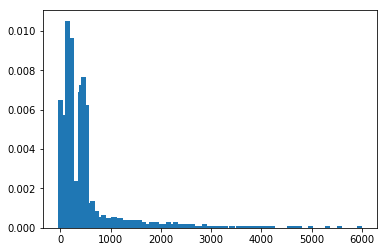

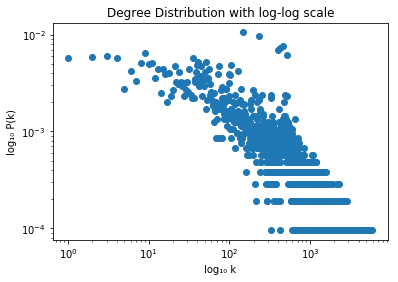

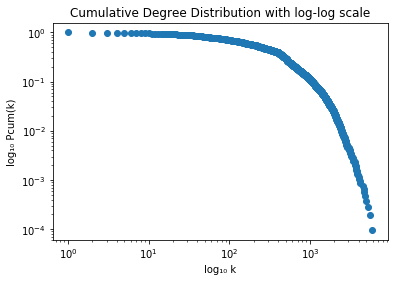

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections
import powerlaw as pl

#1.Creation of Graph
def createGraph():
    G=nx.Graph()

    #read edges from csv file
    file_edges=open("4-edges.csv", "r")
    #for n in range(200):
    while(1):
        content = file_edges.readline()
        if content == "":
            break
        line = content.split(",")
        #print(line[0], line[1], line[2])
        G.add_edge(line[0], line[1]) #ignore weight of edges
    
    return G
    #number_of_nodes = G.number_of_nodes()

#2.Degree analysis

#Average Degree
def averageDegree(G):
    E = G.number_of_edges()
    N = G.number_of_nodes()
    av_degree = (2*E)/N
    return av_degree

#Degree Distribution

#obtain degree histogram
#def histogram(G):
 #   degrees = G.degree #get list with pairs (node, degree)
    #print("Degrees:", degrees)
  #  valuesDeg = [d for n, d in degrees] #get list of degrees of each node
  #  plt.hist(valuesDeg, 100, range=[0, 3500], normed=1) #plot histogram (normalized count)
  #  plt.title("Degree Histogram")
  #  plt.ylabel("P(k)")
  #  plt.xlabel("k")
  #  plt.show()
    
#obtain plot of histogram, degree distribution and cumulative degree distribution
def distribution(G):
    #get sequence of the degrees of each node ordered 
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    #print("Degree sequence", degree_sequence)
    degreeCount = collections.Counter(degree_sequence) #gives a list that as the degree and number of times it repeats
    #print("Degree count", degreeCount)
    degree, count = zip(*degreeCount.items()) #to obtain arguments separated 
    N = G.number_of_nodes()
    count = list(count) #convert to list
    #print("Count before norm:", count)
    # normalize count to obtain P(k)
    for i in range(len(count)):
        count[i] = count[i]/N
    
    plt.figure() 
    plt.bar(degree, count, width=100) #plot histogram
    
    plt.figure()
    plt.loglog(degree, count, 'o') #plot with log scaling on both axis
    plt.title("Degree Distribution with log-log scale")
    plt.ylabel("log₁₀ P(k)")
    plt.xlabel("log₁₀ k")

    count_cum = []
    for i in range(len(count)):
        count_cum += [sum(count[0:i+1])] #append each cum_sum to the list
    
    plt.figure()
    plt.loglog(degree, count_cum, 'o') #plot with log scaling on both axis
    plt.title("Cumulative Degree Distribution with log-log scale")
    plt.ylabel("log₁₀ Pcum(k)")
    plt.xlabel("log₁₀ k")
    
    #prepare data_array
    max_degree = max(degree_sequence) #obtain maximum degree to determine size o data_array to fit the power-law
    print("max:", max_degree)
    count_degree = np.zeros((max_degree,), dtype=int) # array with count for each degree, including count zero
    #degree corresponds to index
    for key,value in degreeCount.items(): #degreeCount is a dictionary with key-degree and values-count
        print("k,count:", key,value)
        count_degree[key-1] = value
    
    #determine gamma for degree distribution
    parameters = pl.Fit(count_degree) #obtain parameters fitting to a power law distribution according to data
    gamma = parameters.alpha
    print("Gamma:", gamma)
    print("kmin:", parameters.xmin)
    print("kmax:", parameters.xmax)
    
G = createGraph()
av_degree = averageDegree(G)
print("Average degree: ", av_degree)
#histogram(G)
distribution(G)
